In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

In [2]:
#obter os dados e já dividi-los em treinamento e teste automaticamente
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data() 


Text(0.5, 1.0, '0')

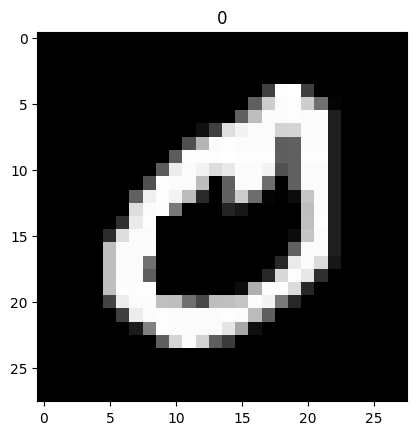

In [6]:
plt.imshow(X_treinamento[21], cmap='gray')
plt.title(y_treinamento[21])

In [12]:
#Mudar dimensão para 784 (original está em 28x28)
print("Forma: ", X_treinamento.shape)
print("Qtd linhas: ", len(X_treinamento))
print("Qtd colunas: ", X_treinamento.shape[1:])

#X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))


Forma:  (60000, 28, 28)
Qtd linhas:  60000
Qtd colunas:  (28, 28)
